In [1]:
from tensorflow import keras
import tensorflow as tf
#import os
import pandas as pd
import numpy as np
#from rdkit import Chem
#from rdkit.Chem import Draw, Descriptors
#from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
#from keras import optimizers
#from tqdm import tqdm
#%matplotlib inline
from tensorflow.keras import layers
from tensorflow import nn
import collections
#from hyperopt import Trials, STATUS_OK, tpe
#from hyperas import optim
#from hyperas.distributions import choice, uniform
from rdkit.Chem import Descriptors
from rdkit import Chem
from rdkit.Chem import AllChem
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, multilabel_confusion_matrix


In [2]:
data = pd.read_csv('pur_nord_5.csv', sep="\t",low_memory=False)
X_train = np.load("X_train_n_5.npy")

In [4]:
def get_best_s():
    zest = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    zesp = 0.2
    zel = []
    maxpr = 0
    best_nr = 0
    bad_count = 0
    for zzyz in range(0,100):

        try:
            preds1 = modelx.predict(X_test2,verbose=0,batch_size=512)
            #print(preds1)
            #print(y_test2)
            preds1[preds1>=zesp] = 1
            preds1[preds1<1-zesp] = 0
            klkl = accuracy_score(y_test2_2, preds1)

            if klkl > maxpr:
                maxpr = klkl
                best_nr = zesp
            #print (klkl)
        except:
            bad_count +=1
        if bad_count >4:
            break
        zesp+=0.005
        zel.append(klkl)
    #print(best_nr)
    #plt.plot(zel)
    print(maxpr)
    #print(np.array(zel).max())
    #plt.plot(zel)
    return best_nr

In [5]:
charset_t = collections.Counter((" ".join(list(data.crude))).split(' '))
print(charset_t)
charset_t=set(charset_t)
char_to_int_t = dict((c,i) for i,c in enumerate(charset_t))
int_to_char_t = dict((i,c) for i,c in enumerate(charset_t))
print(char_to_int_t)
embed_t =  len(charset_t)
print(embed_t)
one_hot_y = np.zeros((len(data), (len(charset_t)) ),dtype=np.int8)
len(one_hot_y[0])
for i,nam in enumerate(data['crude']):
    list_short = list(nam.split(" "))
    first = True
    for z, name in enumerate(list_short):
        if first == True:
            one_hot_y[i][char_to_int_t[name]] = 1
            #first = False
        #elif first !=True:
        #    one_hot_y[i][char_to_int_t[name]+11] = 1
            
Y_train = np.array(one_hot_y)
 

Counter({'ethyl_acetate': 283612, 'hexane': 173175, 'dichloromethane': 95159, 'methanol': 94029, 'chloroform': 35091, 'petroleum_ether': 18849, 'diethyl_ether': 8825, 'toluene': 8484, 'acetone': 6821, 'ethanol': 3804})
{'petroleum_ether': 0, 'chloroform': 1, 'toluene': 2, 'acetone': 3, 'ethanol': 4, 'methanol': 5, 'dichloromethane': 6, 'hexane': 7, 'diethyl_ether': 8, 'ethyl_acetate': 9}
10


In [6]:
X_train = np.array(X_train)
X_train2, X_test2, y_train2_2,y_test2_2  = train_test_split(X_train,Y_train, test_size=0.1,shuffle=True)

In [2]:
inputA = keras.Input(shape=(8,512),name='inputx')


x = layers.Dense(128, activation="relu")(inputA)

x = layers.Dense(64, activation="relu")(x)

x = layers.Flatten()(x)

p = layers.Dense(64, activation='relu')(x)

p = layers.Dense(10, activation="sigmoid",dtype='float32',name="classification")(p)


modelx = keras.Model(inputs=inputA, outputs=p)

modelx.compile(loss='binary_crossentropy', optimizer="adam", metrics='binary_accuracy')
print (modelx.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputx (InputLayer)          [(None, 8, 512)]          0         
_________________________________________________________________
dense (Dense)                (None, 8, 128)            65664     
_________________________________________________________________
dense_1 (Dense)              (None, 8, 64)             8256      
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                32832     
_________________________________________________________________
classification (Dense)       (None, 10)                650       
Total params: 107,402
Trainable params: 107,402
Non-trainable params: 0
_______________________________________________________

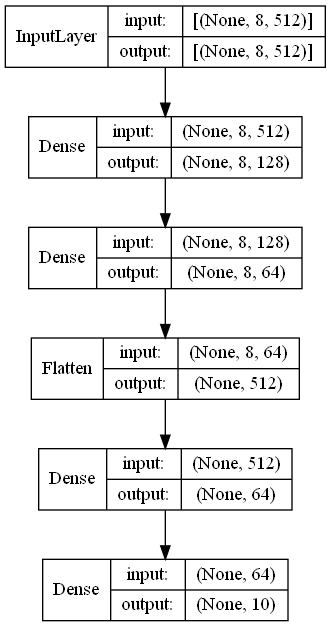

In [3]:
tf.keras.utils.plot_model(
    modelx,
    to_file="model.png",show_shapes=True,show_layer_names=False)

Epoch 1/40
1518/1518 [==============================] - 8s 5ms/step - loss: 0.2940 - binary_accuracy: 0.8743 - val_loss: 0.2337 - val_binary_accuracy: 0.9032
Epoch 2/40
1518/1518 [==============================] - 7s 5ms/step - loss: 0.2184 - binary_accuracy: 0.9107 - val_loss: 0.2017 - val_binary_accuracy: 0.9184
Epoch 3/40
1518/1518 [==============================] - 7s 4ms/step - loss: 0.1868 - binary_accuracy: 0.9258 - val_loss: 0.1830 - val_binary_accuracy: 0.9275
Epoch 4/40
1518/1518 [==============================] - 7s 4ms/step - loss: 0.1669 - binary_accuracy: 0.9346 - val_loss: 0.1739 - val_binary_accuracy: 0.9315
Epoch 5/40
1518/1518 [==============================] - 7s 4ms/step - loss: 0.1537 - binary_accuracy: 0.9401 - val_loss: 0.1603 - val_binary_accuracy: 0.9378
Epoch 6/40
1518/1518 [==============================] - 7s 4ms/step - loss: 0.1435 - binary_accuracy: 0.9444 - val_loss: 0.1546 - val_binary_accuracy: 0.9401
Epoch 7/40
1518/1518 [==============================

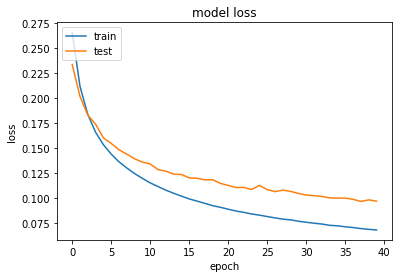

In [22]:
history = modelx.fit(X_train2,y_train2_2, epochs=40, batch_size=256, validation_split = 0.05)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
preds1 = modelx.predict(X_test2,verbose=1,batch_size=512)
#print(preds1)
#print(y_test2)
ac_sc = get_best_s()
preds1[preds1>=ac_sc] = 1
preds1[preds1<1-ac_sc] = 0
print (accuracy_score(y_test2_2, preds1))
print (classification_report(y_test2_2, preds1))
print (multilabel_confusion_matrix(y_test2_2, preds1))

89/89 [==============================] - 0s 2ms/step
0.7272046845418924
0.7272046845418924
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      3528
           1       0.76      0.57      0.65       837
           2       0.74      0.56      0.64       675
           3       0.66      0.34      0.45       403
           4       0.67      0.66      0.67      1851
           5       0.90      0.87      0.88     17234
           6       0.91      0.84      0.87      9550
           7       0.93      0.96      0.94     28260
           8       0.90      0.86      0.88      9408
           9       0.56      0.41      0.48       829

   micro avg       0.90      0.87      0.89     72575
   macro avg       0.79      0.69      0.73     72575
weighted avg       0.90      0.87      0.88     72575
 samples avg       0.88      0.87      0.86     72575

[[[41501   397]
  [  733  2795]]

 [[44439   150]
  [  364   473]]

 [[44616   135]
  [  294   3

In [4]:
inputA = keras.Input(shape=(8,512),name='inputx')

x = layers.LSTM(128,return_sequences=False)(inputA)

p = layers.Dense(128, activation='relu')(x)

p = layers.Dense(64, activation='relu')(x)

p = layers.Dense(10, activation="sigmoid",dtype='float32',name="classification")(p)

modelx = keras.Model(inputs=inputA, outputs=p)

modelx.compile(loss='binary_crossentropy', optimizer="adam", metrics='binary_accuracy')
print (modelx.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputx (InputLayer)          [(None, 8, 512)]          0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               328192    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
classification (Dense)       (None, 10)                650       
Total params: 337,098
Trainable params: 337,098
Non-trainable params: 0
_________________________________________________________________
None


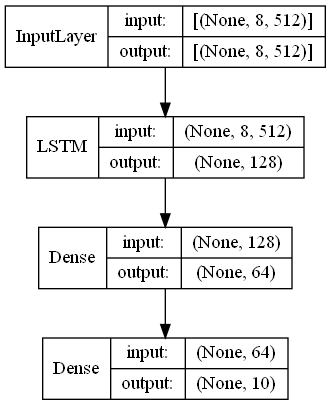

In [5]:
tf.keras.utils.plot_model(
    modelx,
    to_file="model.png",show_shapes=True,show_layer_names=False)

Epoch 1/40
1518/1518 [==============================] - 11s 6ms/step - loss: 0.2991 - binary_accuracy: 0.8713 - val_loss: 0.2495 - val_binary_accuracy: 0.8940
Epoch 2/40
1518/1518 [==============================] - 8s 6ms/step - loss: 0.2326 - binary_accuracy: 0.9030 - val_loss: 0.2020 - val_binary_accuracy: 0.9186
Epoch 3/40
1518/1518 [==============================] - 9s 6ms/step - loss: 0.1786 - binary_accuracy: 0.9289 - val_loss: 0.1702 - val_binary_accuracy: 0.9325
Epoch 4/40
1518/1518 [==============================] - 8s 5ms/step - loss: 0.1395 - binary_accuracy: 0.9458 - val_loss: 0.1411 - val_binary_accuracy: 0.9454
Epoch 5/40
1518/1518 [==============================] - 9s 6ms/step - loss: 0.1128 - binary_accuracy: 0.9571 - val_loss: 0.1194 - val_binary_accuracy: 0.9553
Epoch 6/40
1518/1518 [==============================] - 9s 6ms/step - loss: 0.0937 - binary_accuracy: 0.9648 - val_loss: 0.1075 - val_binary_accuracy: 0.9601
Epoch 7/40
1518/1518 [=============================

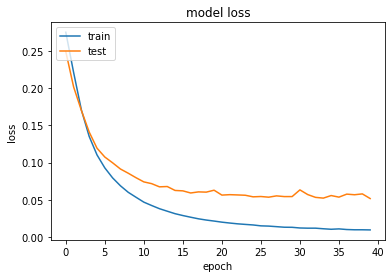

In [25]:
history = modelx.fit(X_train2,y_train2_2, epochs=40, batch_size=256, validation_split = 0.05)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
preds1 = modelx.predict(X_test2,verbose=1,batch_size=512)
#print(preds1)
#print(y_test2)
ac_sc = get_best_s()
preds1[preds1>=ac_sc] = 1
preds1[preds1<1-ac_sc] = 0
print (accuracy_score(y_test2_2, preds1))
print (classification_report(y_test2_2, preds1))
print (multilabel_confusion_matrix(y_test2_2, preds1))

89/89 [==============================] - 0s 3ms/step
0.9014661207238146
0.9014661207238146
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      3528
           1       0.93      0.91      0.92       837
           2       0.92      0.89      0.90       675
           3       0.88      0.83      0.86       403
           4       0.94      0.89      0.91      1851
           5       0.96      0.96      0.96     17234
           6       0.95      0.96      0.95      9550
           7       0.98      0.98      0.98     28260
           8       0.95      0.96      0.96      9408
           9       0.89      0.87      0.88       829

   micro avg       0.96      0.96      0.96     72575
   macro avg       0.94      0.92      0.93     72575
weighted avg       0.96      0.96      0.96     72575
 samples avg       0.96      0.96      0.96     72575

[[[41711   187]
  [  219  3309]]

 [[44535    54]
  [   72   765]]

 [[44696    55]
  [   77   5

In [6]:
inputA = keras.Input(shape=(8,512),name='inputx')

x = layers.Permute((2,1))(inputA)

k = layers.Conv1D(64,12,activation='relu')(x)
k = layers.AveragePooling1D(3)(k)
k = layers.Conv1D(64,12,activation='relu')(k)
k = layers.AveragePooling1D(3)(k)
k = layers.Conv1D(64,5,activation='relu')(k)
k = layers.AveragePooling1D(3)(k)

k = layers.Flatten()(k)

p = layers.Dense(64, activation='relu')(k)

#p = layers.Dense(64, activation='relu')(p)

p = layers.Dense(10, activation="sigmoid",dtype='float32',name="ratio")(p)

modelx = keras.Model(inputs=inputA, outputs=p)

modelx.compile(loss='binary_crossentropy', optimizer="adam", metrics='binary_accuracy')
modelx.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputx (InputLayer)          [(None, 8, 512)]          0         
_________________________________________________________________
permute (Permute)            (None, 512, 8)            0         
_________________________________________________________________
conv1d (Conv1D)              (None, 501, 64)           6208      
_________________________________________________________________
average_pooling1d (AveragePo (None, 167, 64)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 156, 64)           49216     
_________________________________________________________________
average_pooling1d_1 (Average (None, 52, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 48, 64)            2054

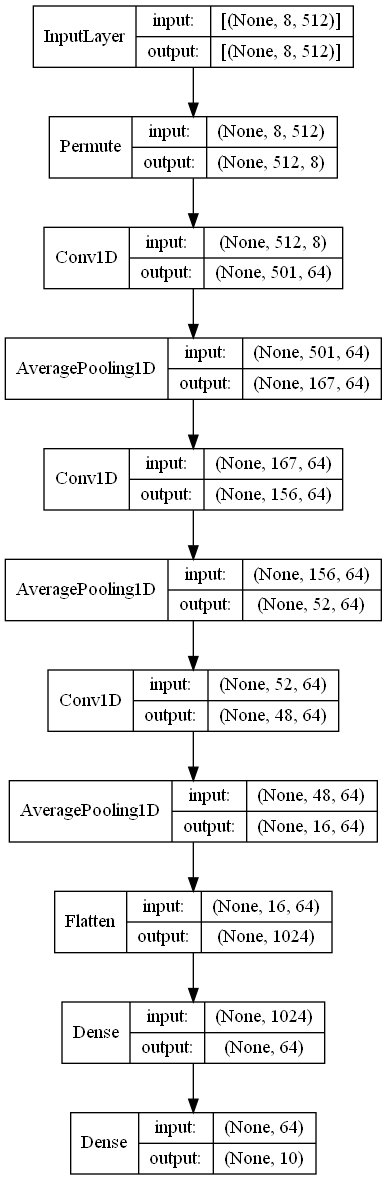

In [7]:
tf.keras.utils.plot_model(
    modelx,
    to_file="model.png",show_shapes=True,show_layer_names=False)

Epoch 1/40
1518/1518 [==============================] - 24s 12ms/step - loss: 0.3205 - binary_accuracy: 0.8603 - val_loss: 0.3004 - val_binary_accuracy: 0.8665
Epoch 2/40
1518/1518 [==============================] - 17s 11ms/step - loss: 0.2973 - binary_accuracy: 0.8681 - val_loss: 0.2929 - val_binary_accuracy: 0.8698
Epoch 3/40
1518/1518 [==============================] - 17s 11ms/step - loss: 0.2893 - binary_accuracy: 0.8723 - val_loss: 0.2852 - val_binary_accuracy: 0.8750
Epoch 4/40
1518/1518 [==============================] - 17s 12ms/step - loss: 0.2810 - binary_accuracy: 0.8772 - val_loss: 0.2788 - val_binary_accuracy: 0.8783
Epoch 5/40
1518/1518 [==============================] - 17s 11ms/step - loss: 0.2733 - binary_accuracy: 0.8810 - val_loss: 0.2723 - val_binary_accuracy: 0.8814
Epoch 6/40
1518/1518 [==============================] - 17s 11ms/step - loss: 0.2658 - binary_accuracy: 0.8848 - val_loss: 0.2680 - val_binary_accuracy: 0.8834
Epoch 7/40
1518/1518 [==================

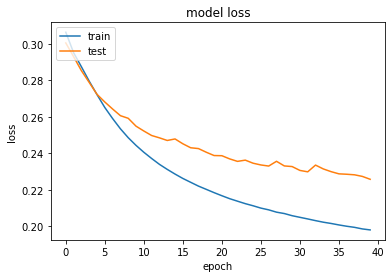

In [9]:
history = modelx.fit(X_train2,y_train2_2, epochs=40, batch_size=256, validation_split = 0.05)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
preds1 = modelx.predict(X_test2,verbose=1,batch_size=512)
#print(preds1)
#print(y_test2)
ac_sc = get_best_s()
preds1[preds1>=ac_sc] = 1
preds1[preds1<1-ac_sc] = 0
print (accuracy_score(y_test2_2, preds1))
print (classification_report(y_test2_2, preds1))
print (multilabel_confusion_matrix(y_test2_2, preds1))

89/89 [==============================] - 1s 7ms/step
0.42521903755558493
0.42521903755558493
              precision    recall  f1-score   support

           0       0.63      0.08      0.14      1929
           1       0.65      0.32      0.43      3463
           2       0.62      0.18      0.27       827
           3       0.60      0.21      0.31       687
           4       0.53      0.08      0.15       404
           5       0.67      0.69      0.68      9254
           6       0.63      0.53      0.58      9560
           7       0.61      0.72      0.66     17374
           8       0.60      0.03      0.06       927
           9       0.76      0.92      0.83     28308

   micro avg       0.69      0.71      0.70     72733
   macro avg       0.63      0.38      0.41     72733
weighted avg       0.68      0.71      0.68     72733
 samples avg       0.68      0.71      0.67     72733

[[[43406    91]
  [ 1776   153]]

 [[41369   594]
  [ 2343  1120]]

 [[44509    90]
  [  681  

C:\Users\XXX\.conda\envs\TF_24\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
